# **Tarea #2: Regresión lineal simple usando TensorFlow en Python**

# Universidad de Monterrey

* Estudiante: Jonathan A. Valadez Saldaña

* Materia: Inteligencia Artificial II

* Profesor:  Andrés Hernández 

30/Agosto/2024 - San Pedro Garza García, N.L.

Siempre cuando se empieza un código en python es importante importar las librerías que vayamos a ocupar para nuestro programa, en este caso usamos las siguientes librerías que cuentan con las siguientes características:
* Numpy: Nos ayuda a realizar operaciones matemáticas
* Tensorflow: Nos permite el desarrollo de redes neuronales 
* Matplotlib: Visualización  gráfica de datos
* Sklearn.model_selection: Nos permite dividir los datos de entrenamiento y los de prueba

In [1]:
#Importamos librerías
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Creamos una función llamada 'generate_data' que trae como parámetros de entrada lo siguiente:
* true_coeffs: Asigamos el número de coeficientes que tendrá nuestro modelo
* noise_std: Le agregamos un ruido con una desviación estándar  de 2
* num_samples: El número total de los datos que queremos generar o registrar

Posteriormente, para poder replicar el experimento y trabajar con el mismo conjunto de datos, usamos una semilla de aleatoriedad, es decir, vamos a generar un conjunto de datos aleatorios únicos, y solo con ese conjunto vamos a desarrollar nuestro modelo, de manera que podamos probar al mismo múltiples veces con los mismos datos generados.

Ahora bien, para poder visualizar estos datos en una gráfica 2D ocupamos generar sus coordenadas X y Y, las cuales pueden ser como nosotros queramos. Para este caso X va estar en un rango entre 0 y el número de datos, que son 100, mientras que para Y tenemos una ecuación que hace uso de los coeficientes del parámetro de entrada, de los valores de X y datos aleatorios. Todo esto representado en la ecuación que se encuentra en el código. Una vez hecho todo esto en la función 'generate_data' devolvemos los valores de X y Y como parámetros de salida. 

In [2]:
# Generamos dataset
def generate_data(true_coeffs=np.array([10, 1]), noise_std=2, num_samples=100):

    # Semilla de reproducibilidad
    np.random.seed(4500)

    # Generamos datos sintéticos
    x = np.arange(0, 100, 1)
    y = true_coeffs[0] + true_coeffs[1]*x + np.random.normal(loc=0.0, scale=noise_std, size=num_samples)

    # Devolvemos características y respuesta
    return(x, y)

Aquí solo se definen los parámetros de entrada y hacemos un llamado a la función 'generate_data'.S

In [3]:
# Generamos datos sintéticos para nuestra regresión lineal
true_coeffs=np.array([10, 1])
noise_std = 5
x, y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)



Ya hecha la llamada de la función y generado la salida de esta, es momento de visualizar el resultado obtenido. Para toda la visualización de los datos vamos a estar usando la librería que definimos como 'plt' y llamando diferentes métodos que nos permitan configurar diferentes partes de nuestra gráfica.

Comenzamos  definiendo las dimensiones de nuestra gráfica, donde se llama  el método 'figure' para darle las dimensiones que tendrá nuestra gráfica, que viene siendo de 10x7. Luego con el método 'scatter' distribuimos todos los datos y le damos la leyenda de esos datos con 'label' de nombre 'Synthetic dataset'. 

Ahora nombramos los ejes, para X se usa el método 'xlabel' y para Y se usa 'ylabel' y posteriormente el texto con el que se nombrará dicho eje, seguido de 'fontsize' para definir el tamaño del texto. Y para darle un título a la gráfica se usa el método 'title' y se realiza prácticamente lo mismo como lo anterior. Ya para finalizar usamos 'legend' para desplegar la leyenda de los datos en la gráfica y el 'show' para mostrar la gráfica.


<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Jonat\AppData\Local\Temp\ipykernel_9988\3378391424.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)


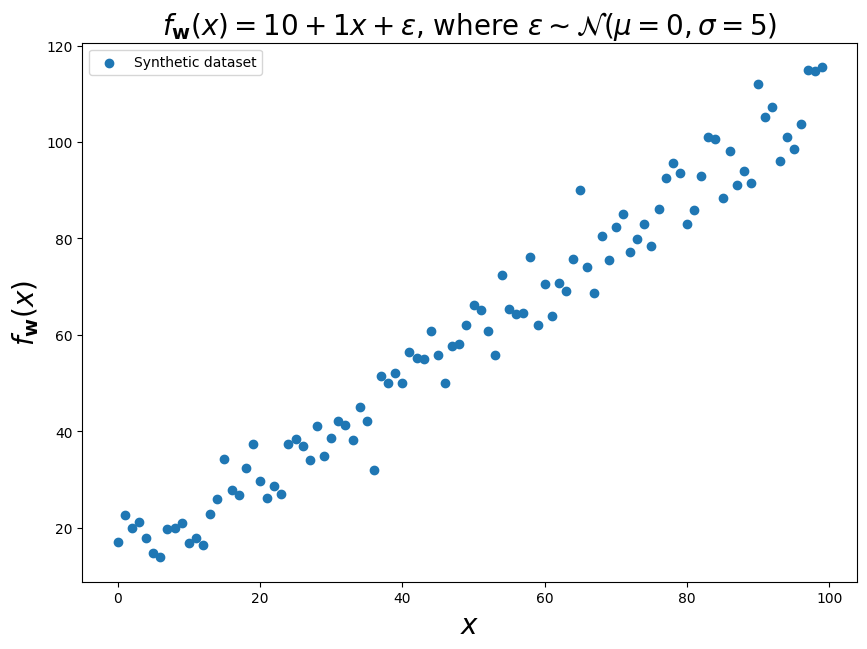

In [4]:
# Visualizamos la generación del dataset sintético
plt.figure(figsize=(10,7))
plt.scatter(x, y, label="Synthetic dataset")
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize=20)
plt.legend()
plt.show()

Empezamos ahora con la división de datos, en donde vamos a tener tanto para los de entrenamiento y prueba, las variables X y Y como se muestra en el código. Normalmente para la división de los datos de entrenamiento se usan el 80% de los datos mientras que para los de prueba el 20% restante, de ahí que se tenga 'test_size=0.2', a su vez, usamos 'random_state=42' para darle una aleatoriedad  única a los datos que se van a usar para entrenamiento y prueba, siendo la semilla de esta aleatoriedad  el número 42, cabe aclarar que no se están modificando los datos, sino el cómo estos mismos se van a repartir, esto con la finalidad de evitar sesgos en nuestro modelo. Y 'shuffle=True' es para que se realice dicha mezcla (aleatoria) de los datos.

Y nuevamente visualizamos en una gráfica cómo se repartieron los datos existentes, en los conjuntos de entrenamiento y de prueba, siendo los datos en azul los de prueba y los rojos los de entrenamiento.

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Jonat\AppData\Local\Temp\ipykernel_9988\2143441193.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)


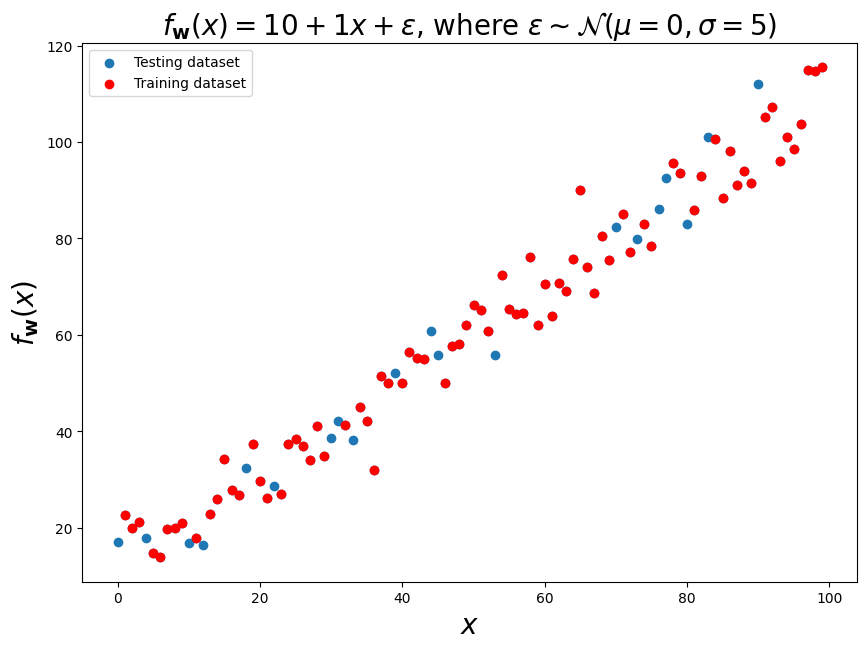

In [5]:
# Divida los datos en entrenamiento y prueba usando 'train_test_split'
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

# Visualizamos la generación del dataset sintético
plt.figure(figsize=(10,7))
plt.scatter(x, y, label="Testing dataset")
plt.scatter(x_train, y_train, label="Training dataset", color=[1, 0, 0] )
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize=20)
plt.legend()
plt.show()

Ahora vamos a desarrollar nuestro modelo, para ello necesitamos definir sus características. Hacemos uso de la librería Tensorflor que la definimos como 'tf' y se llama al método 'keras' el cual es una interfaz de usuario intuitiva (API) de alto nivel para desarrollar modelos complejos, en este caso el modelo es del tipo secuencial, lo que quiere decir que es una cadena de capas que tienen una única entrada y salida, es por ello que dentro de esta secuencia en 'layers' tenemos una salida de 1 y la densidad de neuronas es también de 1, lo que quiere decir que solo contamos con una neurona en el modelo. 

Compilamos el modelo con el optimizador 'Adam', que es un método de descenso de gradiente para actualizar los pesos y la pérdida 'mse' (error cuadrático medio) es un método para medir que tan bueno es nuestro modelo comparando los datos y la estimación del modelo. Entre más pequeño el valor, menor es el error que está haciendo nuestro modelo y por lo tanto es más preciso a los datos. 

Finalmente tenemos mostramos un resumen de las características de nuestro modelo. 

In [6]:
# Construimos el modelo de regresión lineal usando una entrada multiple con una simple neurona
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Una vez configurado el modelo procedemos a entrenarlo con los datos de entrenamiento, y asignándole 'epochs', que en este caso vienen siendo 500 iteraciones, esto para que pueda aprender bien los datos y hacer una buena estimación. Por otro lado tenemos 'batch_size', que es el número de lotes en los que se van a dividir los datos de entrenamiento, y donde el modelo los procesa de adelante hacía atrás, esto antes de actualizar los pesos del mismo. 

Batch_size es una indicación para señalar cuántos de esos datos de entrenamiento se van a usar como datos de validación, con estos mismos comparamos qué tan bien nuestro modelo generaliza o predice nuevos datos no vistos. Y ya por último 'verbose' se utiliza para tener una descripción breve del progreso de las épocas del modelo, dando métricas como la perdida (loss), precisión o  la velocidad que le toma cada época. Esto puede ser útil para ver el rendimiento que está teniendo el modelo y en caso de tener una divergencia con los datos, realizar una parada temprana del mismo (early-stopping).

Por último evaluamos el error, comparando los datos de validación con las predicciones del modelo, en otras palabras, se calcula el valor promedio de perdida a partir de los datos de validación.

In [7]:
# Entrenamos el modelo
model.fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.10, verbose=1)

# Evaluamos el modelo
loss = model.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 19771.4238 - val_loss: 28090.1875
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22146.3105 - val_loss: 27916.1816
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21499.4277 - val_loss: 27740.6895
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21016.9492 - val_loss: 27566.9766
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23222.5801 - val_loss: 27400.8320
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23214.1758 - val_loss: 27236.6367
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19936.2598 - val_loss: 27078.0742
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19548.3594 - val_loss: 26909.7559
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21281.5312 - val_loss: 26742.8555
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18420.4180 - val_loss: 26589.4277
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20402.5977 - val_loss: 26431.7

Extraemos los pesos de las capas de nuestro modelo. y al solo contar con una capa, ya que nuestra red es simple, entonces solo tomamos esa, que viene siendo 'layers[0]' y ya la empezamos a obtener con el método 'get_weights'. 

Imprimimos el peso (weights[0]) y el sesgo (weights[1]). Los pesos determinan la influencia que tienen los datos de entrada en el producto final, mientras que los sesgos son unidades independientes que se agregan a los datos, ajustando el flujo de la red para dar un resultado más preciso. 

In [8]:
# Imprimimos los pesos del modelo entrenado
weights = model.layers[0].get_weights()
print(f"Weights [w1]: {weights[0]}")
print(f"Biases [w0]: {weights[1]}")

Weights [w1]: [[0.98309606]]
Biases [w0]: [2.5205183]


Una vez  entrenado el modelo, y asegurarnos de que el progreso del entrenamiento no haya tenido inconvenientes, ponemos aprueba ahora nuestro modelo resultante y comparamos las predicciones con los datos reales. 

In [9]:
# Hacemos predicciones
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


Graficamos esta comparativa, donde nombramos los datos de entrenamiento como 'Training data', mientras a la predicciones la nombramos como 'Model', con un 'linewidth' de 3 y en color rojo (1,0,0). A su vez nombramos los ejes con un 'fontsize' de 20 y terminamos mostrando la gráfica.

Podemos observar que nuestro modelo creado si desarrolla de manera correcta las estimaciones de los datos, ya que se ajusta muy bien a las mismas, lo que nos da un muy buen modelo para esta tarea de regresión lineal, usando una red neuronal simple.

<>:7: SyntaxWarning: invalid escape sequence '\h'
<>:7: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Jonat\AppData\Local\Temp\ipykernel_9988\1179736667.py:7: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize=20)


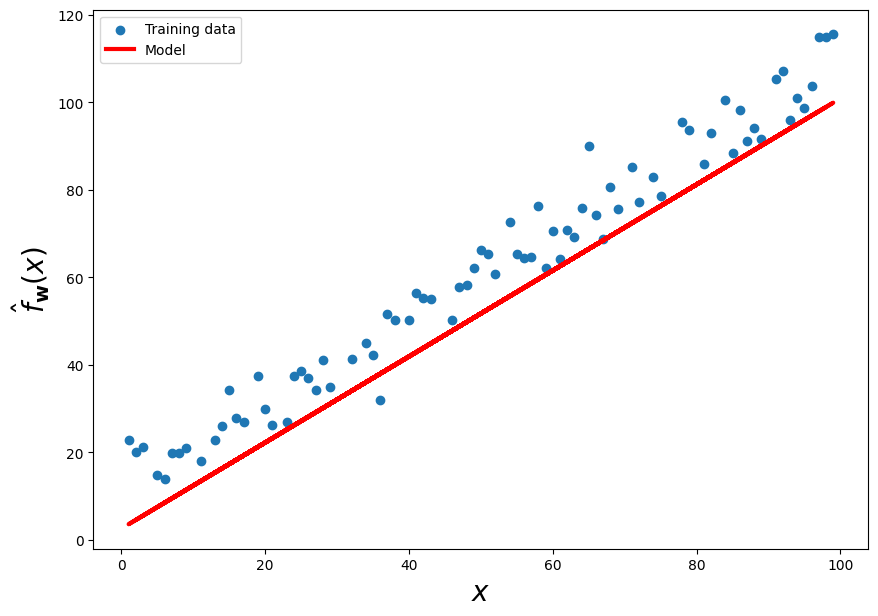

In [10]:
# Graficamos los resultados
plt.figure(figsize=(10, 7))

plt.scatter(x_train, y_train, label="Training data")
plt.plot(x_train, y_pred_train, label="Model", linewidth=3, color=[1,0,0])
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize=20)
plt.legend();

### **Conclusiones**

La actividad se me hace interesante, sobre todo la parte del desarrolllo del modelo de nuestra red neuronal simple. Es importante conocer toda la estructura del código, comenzando con las librerías, definición de las funciones a usar, sus variables o parámetros de entrada y salida, y luego ya comenzar con el desarrollo del modelo, como lo es la división de los datos, asignar las características que manejará el modelo, entrenar el modelo y finalmente probar su funcionamiento.

Por experiencia en python, yo ya conocía algunas cosas, como la importación de librerías, realizar funciones, y generar gráficas en base a datos, así como la división de datos de entrenamiento y de prueba, y probado otros tipos de modelos como lo son el PCA, KNN, K-Means o Clustering, pero esta parte nueva que es el uso o desarrollo de redes neuronales, que es este caso solo es una simple neurona, se me hizo llamativo el ver sus características y el cómo tú  mismo puedes configurar el modelo, dependiendo de la aplicación me imagino que se usan diferentes estructuras, procesamientos, optimizadores y funciones de costo, pero está muy padre el ver cómo con esto y ver su progreso en las épocas o interacciones, genera diferentes resultados según lo que hayas puesto, y que dependiendo de eso puede generar buenos o malos resultados, y viéndolo de esa forma, también nosotros estarías aprendiendo, iterando entre configuración y configuración a desarrollar redes neuronales y tener una mejor noción de lo que implica el uso de estas herramientas poderosas. 

### **Referencias**

* ChatGPT. (2024, agosto 26). Explicación del Modelo Keras: https://chatgpt.com/c/e50b0a86-253b-4607-966f-b55f6511e4bb
* ChatGPT. (2024, agosto 27). Batch Size Validation Verbose:https://chatgpt.com/c/41d5eb82-23af-4f7a-aa91-f38dfd20a59c
* Equipo editorial de IONOS. (8 de Octubre de 2020). Keras: biblioteca de código abierto para crear redes neuronales. Obtenido de IONOS: https://www.ionos.mx/digitalguide/online-marketing/marketing-para-motores-de-busqueda/que-es-keras/
* Keras. (s.f.). Adam. Obtenido de Keras: https://keras.io/api/optimizers/adam/

